In [1]:
# Import necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

# Load the Titanic dataset
data = pd.read_csv('Titanic-Dataset.csv')
# Display first few rows of the data
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# View basic info of the dataset
print(data.info())  # Gives a summary of the dataset, including data types and missing values

# View the shape (number of rows and columns)
print(f"\nShape of dataset: {data.shape}")  # Shape of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Shape of dataset: (891, 12)


In [3]:
# Display summary statistics
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Fill missing Age values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most frequent value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [6]:
# Drop irrelevant columns
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [7]:
# Check for duplicates in the dataset
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")



Number of duplicate rows: 116


In [8]:
# Dropping duplicate rows
data = data.drop_duplicates()

In [9]:
# Confirming the removal of duplicates
new_duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows after removal: {new_duplicate_count}")

# Check the new shape of the dataset
print(f"New shape of the dataset: {data.shape}")


Number of duplicate rows after removal: 0
New shape of the dataset: (775, 8)


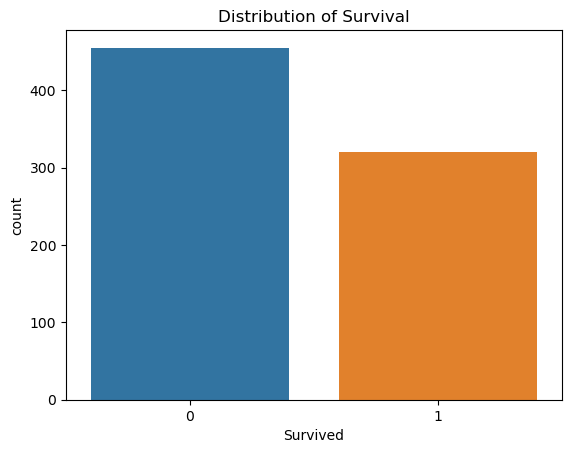

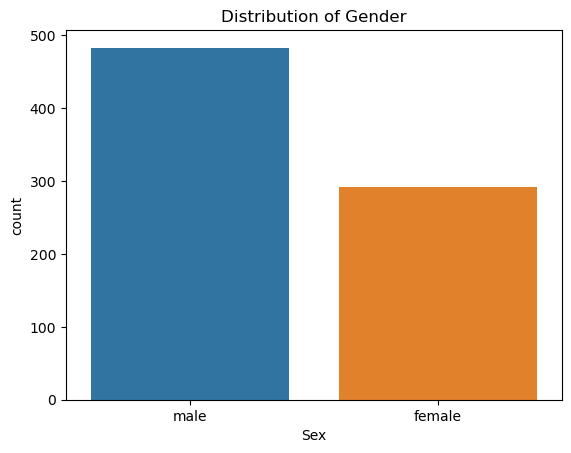

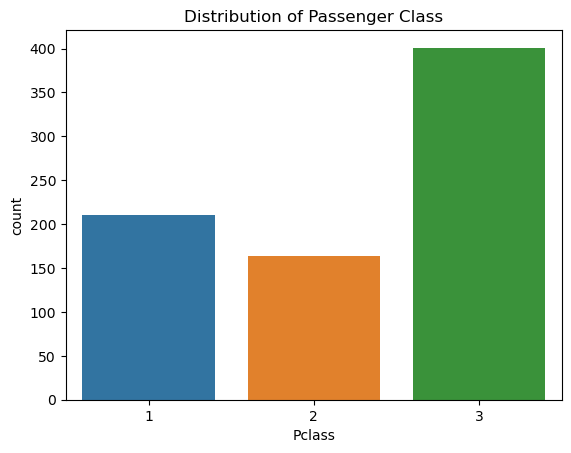

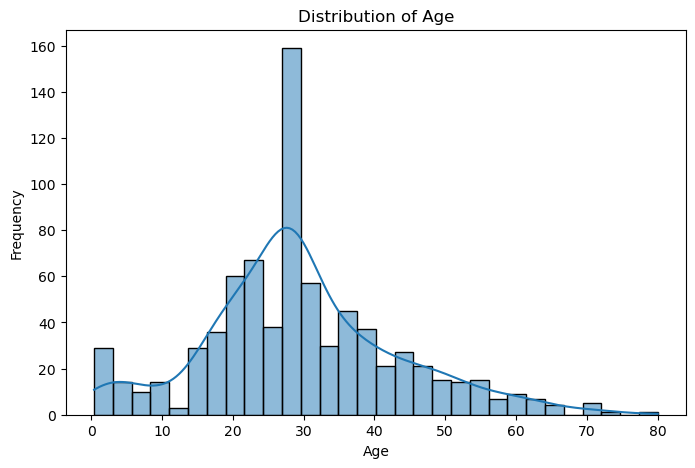

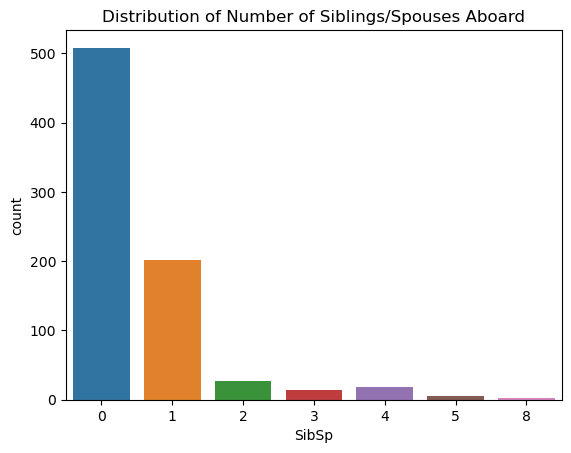

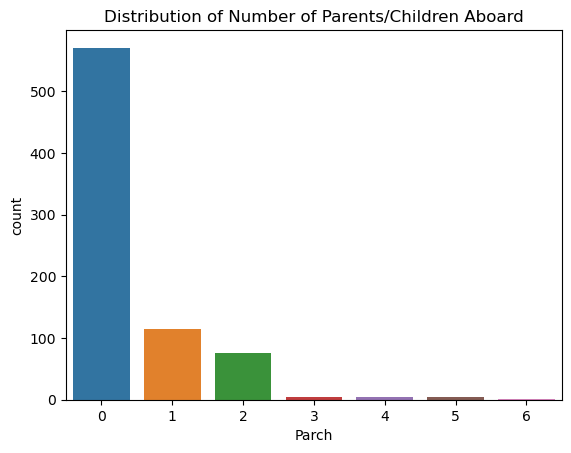

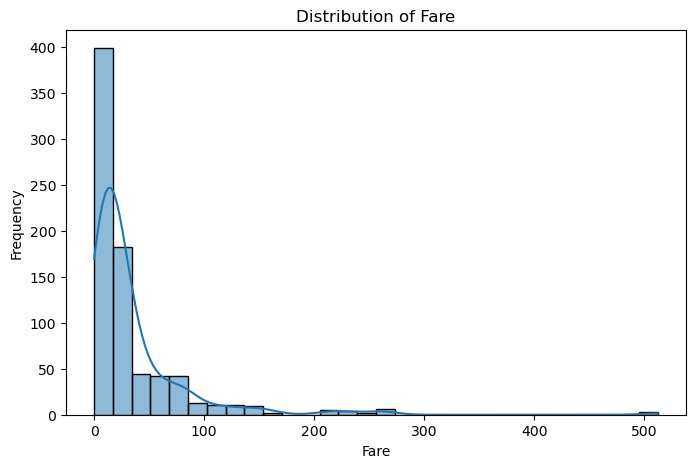

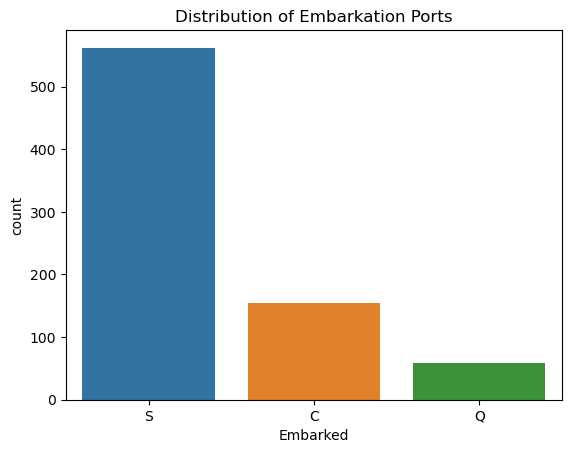

In [10]:
# Univariate analysis for key features

# Visualizing 'Survived' distribution
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.show()

# Visualizing 'Sex' distribution
sns.countplot(x='Sex', data=data)
plt.title('Distribution of Gender')
plt.show()

# Visualizing 'Pclass' distribution
sns.countplot(x='Pclass', data=data)
plt.title('Distribution of Passenger Class')
plt.show()

# Visualizing 'Age' distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing 'SibSp' distribution
sns.countplot(x='SibSp', data=data)
plt.title('Distribution of Number of Siblings/Spouses Aboard')
plt.show()

# Visualizing 'Parch' distribution
sns.countplot(x='Parch', data=data)
plt.title('Distribution of Number of Parents/Children Aboard')
plt.show()

# Visualizing 'Fare' distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Visualizing 'Embarked' distribution
sns.countplot(x='Embarked', data=data)
plt.title('Distribution of Embarkation Ports')
plt.show()


## INSIGHTS
1. Mostly people were MALE.
2. Survival rate was low means most people were dead due to varies factors.
3. Maximum people were alone / had no sibling.
4. Maximum people did not come with parents/children.
5. Mostly people were lies b/w 18-35 age group.
6. Most fare distribution lies 0-100 but here are alot of of outliers. Therefore, detect outliers is compulsory.
7. Maximum people died who belongs to class 3.
8. Class 1 survival rate is higher.

In [11]:
# Survival counts by gender (Sex)
data.groupby('Sex')['Survived'].value_counts().unstack().rename(columns={0: 'Not Survived', 1: 'Survived'})


Survived,Not Survived,Survived
Sex,,
female,76,216
male,379,104


#### Max. are male but survival rate of Female is higher than male.

In [12]:
# Survival counts by passenger class (Pclass)
data.groupby('Pclass')['Survived'].value_counts().unstack().rename(columns={0: 'Not Survived', 1: 'Survived'})


Survived,Not Survived,Survived
Pclass,,
1,77,133
2,81,83
3,297,104


#### Survival rate of CLASS 1 is higher. There might be few reasons (higher paid , get easier boat , etc).
#### Survival rate of CLASS 2 is 50/50.
#### Survival rate of CLASS 3 is low.

In [13]:
# Survival counts by passenger class and gender
data.groupby(['Pclass', 'Sex'])['Survived'].value_counts().unstack().rename(columns={0: 'Not Survived', 1: 'Survived'})


Survived       Not Survived  Survived
Pclass Sex                           
1      female             3        90
       male              74        43
2      female             6        66
       male              75        17
3      female            67        60
       male             230        44

### Survival rate of female is more than male in every Class.

In [14]:
# Create age groups and view survival counts by age group
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Survival counts for non-survivors by age group
data[data['Survived'] == 0].groupby('AgeGroup')['Survived'].value_counts().unstack().rename(columns={0: 'Not Survived', 1: 'Survived'})


Survived,Not Survived
AgeGroup,
0-18,50
19-35,268
36-50,91
51-65,36
66+,10


### Maximum b/w age lies b/w 19-35. So, dead rate of this age group is also higher than others. 

In [15]:
# Survival counts by age group and gender
data.groupby(['AgeGroup', 'Sex'])['Survived'].value_counts().unstack().rename(columns={0: 'Not Survived', 1: 'Survived'})


Survived         Not Survived  Survived
AgeGroup Sex                           
0-18     female            17        37
         male              33        23
19-35    female            43       116
         male             225        52
36-50    female            14        44
         male              77        22
51-65    female             2        19
         male              34         6
66+      female             0         0
         male              10         1

### In every age group, female survival rate is more than male. 

In [16]:
# Survival counts by SibSp (Number of siblings/spouses aboard)
data.groupby('SibSp')['Survived'].value_counts().unstack().rename(columns={0: 'Not Survived', 1: 'Survived'})


Survived,Not Survived,Survived
SibSp,,
0,314.0,194.0
1,94.0,107.0
2,15.0,12.0
3,10.0,4.0
4,15.0,3.0
5,5.0,NaN
8,2.0,NaN


In [17]:
# Survival counts by Parch (Number of parents/children aboard)
data.groupby('Parch')['Survived'].value_counts().unstack().rename(columns={0: 'Not Survived', 1: 'Survived'})


Survived,Not Survived,Survived
Parch,,
0,358.0,213.0
1,51.0,63.0
2,35.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


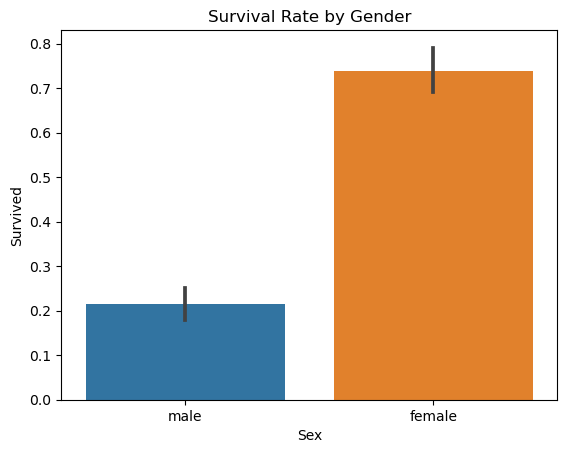

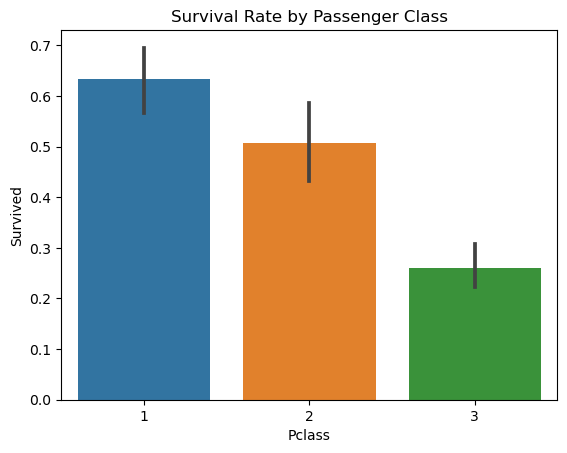

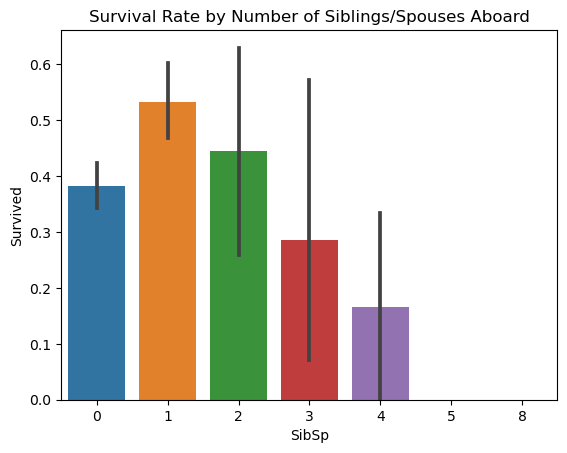

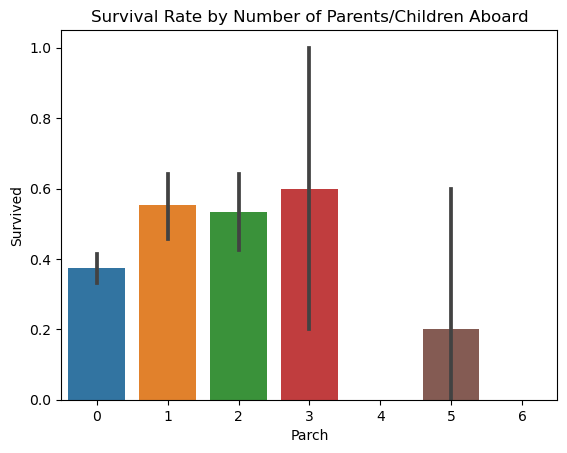

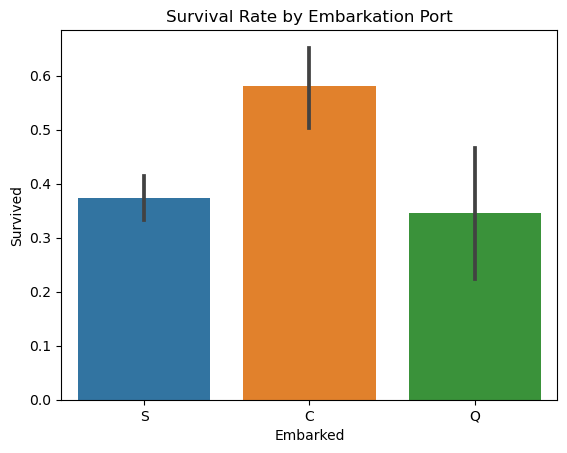

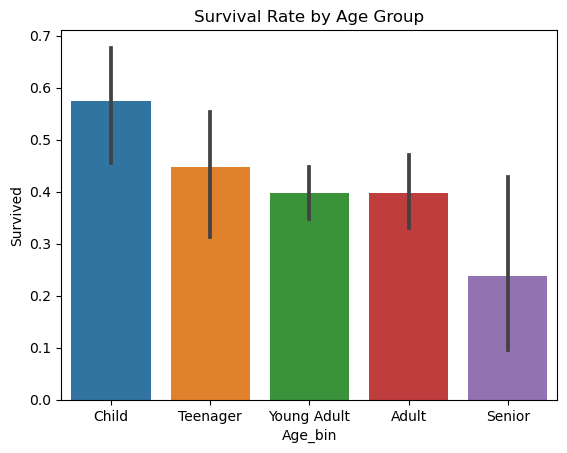

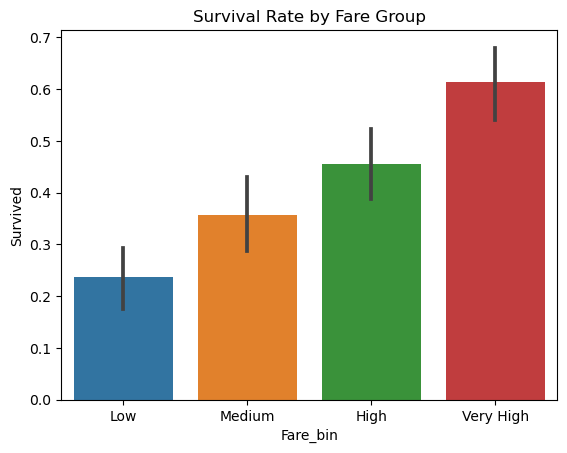

In [18]:
# Bivariate analysis - checking relationship between 'Survived' and other features

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by number of siblings/spouses aboard
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.show()

# Survival rate by number of parents/children aboard
sns.barplot(x='Parch', y='Survived', data=data)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

# Survival rate by embarkation port
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarkation Port')
plt.show()

# Survival rate by age (using binning to categorize age groups)
data['Age_bin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='Age_bin', y='Survived', data=data)
plt.title('Survival Rate by Age Group')
plt.show()

# Survival rate by fare (using binning to categorize fare groups)
data['Fare_bin'] = pd.qcut(data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.barplot(x='Fare_bin', y='Survived', data=data)
plt.title('Survival Rate by Fare Group')
plt.show()


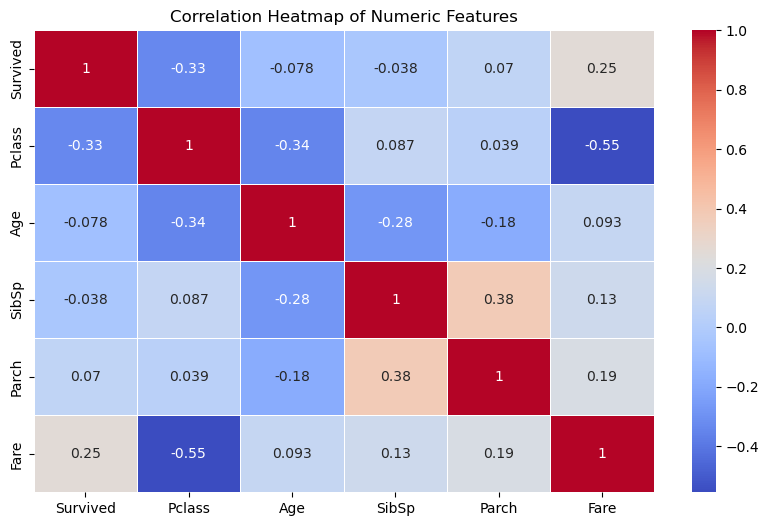

In [19]:
# Filter the dataset to include only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Creating a correlation matrix using only the numeric data
corr_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


Survived vs Pclass (-0.33): There is a moderate negative correlation between survival and passenger class, indicating that passengers from higher classes were more likely to survive.

Survived vs Fare (0.25): A positive correlation shows that passengers who paid higher fares had a slightly better chance of survival.

Pclass vs Fare (-0.55): A strong negative correlation exists between passenger class and fare, as expected. Higher classes paid more for tickets.

SibSp and Parch vs Survival: These show weak correlations with survival, indicating that having siblings/spouses or parents/children aboard doesn't strongly predict survival.

SibSp vs Parch (0.38): There's a moderate positive correlation, which suggests that passengers with siblings/spouses aboard were also likely to have parents/children aboard.

In [20]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in '{column}':\n", outliers)
    return outliers

# Example for detecting outliers in 'Age' and 'Fare'
age_outliers = detect_outliers_iqr(data, 'Age')
fare_outliers = detect_outliers_iqr(data, 'Fare')


Outliers in 'Age':
      Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked AgeGroup  \
33          0       2    male  66.0      0      0   10.5000        S      66+   
54          0       1    male  65.0      0      1   61.9792        C      66+   
94          0       3    male  59.0      0      0    7.2500        S    51-65   
96          0       1    male  71.0      0      0   34.6542        C      66+   
116         0       3    male  70.5      0      0    7.7500        Q      66+   
170         0       1    male  61.0      0      0   33.5000        S    51-65   
232         0       2    male  59.0      0      0   13.5000        S    51-65   
252         0       1    male  62.0      0      0   26.5500        S    51-65   
275         1       1  female  63.0      1      0   77.9583        S    51-65   
280         0       3    male  65.0      0      0    7.7500        Q      66+   
326         0       3    male  61.0      0      0    6.2375        S    51-65   
366     

### There are around 102 people who paid higher amount. There might be few reasons like:- late reservation, more safely (means live jacket / boat provided during any critical situation), etc.

In [21]:

# Encoding categorical variables (Sex and Embarked) to numeric form
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # male = 1, female = 0
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])  # S = 2, C = 0, Q = 1


In [22]:
# Label encode Age_bin and Fare_bin
data['Age_bin'] = label_encoder.fit_transform(data['Age_bin'])
data['Fare_bin'] = label_encoder.fit_transform(data['Fare_bin'])


In [23]:
# Split the data again after encoding
X = data.drop(columns=['Survived'])
y = data['Survived']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")



Training set shape: (620, 10)
Testing set shape: (155, 10)


In [24]:


# Apply One-Hot Encoding to categorical variables
X = pd.get_dummies(data.drop(columns=['Survived']), drop_first=True)  # Drop 'Survived' and apply encoding
y = data['Survived']

# Split the data again after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")



Accuracy: 0.7871

Confusion Matrix:
[[77 18]
 [15 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        95
           1       0.71      0.75      0.73        60

    accuracy                           0.79       155
   macro avg       0.78      0.78      0.78       155
weighted avg       0.79      0.79      0.79       155



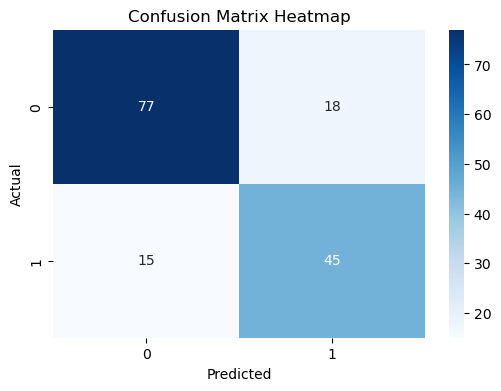

In [25]:
# Step 10: Heatmap of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1. 77 passengers correctly predicted as not surviving (True Negatives)
2. 45 passengers correctly predicted as surviving (True Positives)
3. 18 passengers incorrectly predicted as surviving (False Positives)
4. 15 passengers incorrectly predicted as not surviving (False Negatives)

The precision, recall, and F1-scores indicate the model performs fairly well, with an overall accuracy of 79%.